## Tensors

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = torch.ones(2, 3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [13]:
x = torch.ones(1, 5, dtype=torch.float16)
x.dtype

torch.float16

In [14]:
print(x.size())

torch.Size([1, 5])


In [15]:
x = torch.tensor([4, 5, 7])
x

tensor([4, 5, 7])

In [16]:
x = torch.rand(2, 3)
print(x)
y = torch.rand(2, 3)
print(y)
print(x + y, torch.add(x, y))
print(y.add_(x))

tensor([[0.1500, 0.2900, 0.6668],
        [0.0124, 0.4886, 0.5515]])
tensor([[0.8988, 0.9216, 0.7543],
        [0.1800, 0.5743, 0.7664]])
tensor([[1.0488, 1.2116, 1.4211],
        [0.1924, 1.0630, 1.3180]]) tensor([[1.0488, 1.2116, 1.4211],
        [0.1924, 1.0630, 1.3180]])
tensor([[1.0488, 1.2116, 1.4211],
        [0.1924, 1.0630, 1.3180]])


In [17]:
x = torch.rand(2, 3)
print(x)
y = torch.rand(2, 3)
print(y)
print(x - y, torch.sub(x, y))

tensor([[0.6195, 0.7391, 0.3101],
        [0.4686, 0.0838, 0.2808]])
tensor([[0.5470, 0.5994, 0.7281],
        [0.7816, 0.6036, 0.8533]])
tensor([[ 0.0725,  0.1397, -0.4181],
        [-0.3129, -0.5198, -0.5724]]) tensor([[ 0.0725,  0.1397, -0.4181],
        [-0.3129, -0.5198, -0.5724]])


In [18]:
print(x * y, torch.mul(x, y))
print(x / y, torch.div(x, y))
print(x**2)

tensor([[0.3388, 0.4431, 0.2258],
        [0.3663, 0.0506, 0.2396]]) tensor([[0.3388, 0.4431, 0.2258],
        [0.3663, 0.0506, 0.2396]])
tensor([[1.1325, 1.2330, 0.4258],
        [0.5996, 0.1388, 0.3291]]) tensor([[1.1325, 1.2330, 0.4258],
        [0.5996, 0.1388, 0.3291]])
tensor([[0.3837, 0.5463, 0.0961],
        [0.2196, 0.0070, 0.0789]])


In [19]:
x = torch.randn(5, 3)
print(x)
print(x[:, 0])
print(x[1, 1], x[1, 1].item())

tensor([[ 1.0488, -0.5108, -1.6076],
        [-0.2734, -0.4665,  0.0186],
        [ 0.3880,  0.1155, -0.4798],
        [ 0.8619, -0.1219, -0.2592],
        [ 1.5373,  1.5585,  0.5890]])
tensor([ 1.0488, -0.2734,  0.3880,  0.8619,  1.5373])
tensor(-0.4665) -0.466489315032959


In [20]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
y = x.view(-1, 8)
print(y)

tensor([[-0.9854,  0.8124, -0.3213,  0.7426],
        [ 1.2739,  0.2001, -0.1885,  1.7861],
        [ 0.3776,  0.7444, -1.4385, -0.3465],
        [-0.2547, -0.7755,  1.4134,  0.1838]])
tensor([-0.9854,  0.8124, -0.3213,  0.7426,  1.2739,  0.2001, -0.1885,  1.7861,
         0.3776,  0.7444, -1.4385, -0.3465, -0.2547, -0.7755,  1.4134,  0.1838])
tensor([[-0.9854,  0.8124, -0.3213,  0.7426,  1.2739,  0.2001, -0.1885,  1.7861],
        [ 0.3776,  0.7444, -1.4385, -0.3465, -0.2547, -0.7755,  1.4134,  0.1838]])


In [21]:
a = torch.ones(5)
b = a.numpy()
print(b)
a.add_(1)
print(a, b)  # in cpu they point to same memory location

[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]


In [22]:
a = np.ones(6)
b = torch.from_numpy(a)
print(a, b)
a += 1
print(a, b)

[1. 1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [23]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5, device=device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y
    print(z)
    z = z.to('cpu')
    print(z.numpy())

In [24]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## autograd

In [25]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 2.2368,  0.3076, -0.9402], requires_grad=True)


In [26]:
y = x + 2
print(y)
z = y * y * 2
z = z.mean()
print(z)
z.backward()
print(x.grad)

tensor([4.2368, 2.3076, 1.0598], grad_fn=<AddBackward0>)
tensor(16.2657, grad_fn=<MeanBackward0>)
tensor([5.6490, 3.0768, 1.4130])


In [27]:
y = x + 2
print(y)
z = y * y * 2
# z=z.mean()
print(z)
v = torch.tensor([0.1, 1.0, 3.0])
z.backward(v)
print(x.grad)

tensor([4.2368, 2.3076, 1.0598], grad_fn=<AddBackward0>)
tensor([35.9007, 10.6501,  2.2461], grad_fn=<MulBackward0>)
tensor([ 7.3438, 12.3073, 14.1300])


In [28]:
# x.requires_grad_(False)
# x.detach_()
# with torch.no_grad()
x.requires_grad_(False)
print(x)
x = torch.randn(3, requires_grad=True)
print(x)
x.detach_()
print(x)
x = torch.randn(3, requires_grad=True)
print(x)
with torch.no_grad():
    y = x + 2
    print(y)

tensor([ 2.2368,  0.3076, -0.9402])
tensor([-0.6079, -2.1915, -0.7412], requires_grad=True)
tensor([-0.6079, -2.1915, -0.7412])
tensor([ 1.2572,  0.7355, -1.6303], requires_grad=True)
tensor([3.2572, 2.7355, 0.3697])


In [29]:
w = torch.ones(4, requires_grad=True)
for epoch in range(5):
    out = (3 * w**2).sum()
    out.backward()
    print(w.grad)
    w.grad.zero_()

tensor([6., 6., 6., 6.])
tensor([6., 6., 6., 6.])
tensor([6., 6., 6., 6.])
tensor([6., 6., 6., 6.])
tensor([6., 6., 6., 6.])


## Backpropagation

In [30]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
yhat = w * x
loss = (yhat - y)**2
loss.backward()
print(w.grad)

tensor(-2.)


## Linear Regression 

In [59]:
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10], dtype=torch.float32)
alpha = 0.015
w = torch.tensor(0, dtype=torch.float32, requires_grad=True)


def forward(x, w):
    return w * x


def loss(y_pred, y):
    return ((y_pred - y)**2).mean()


for e in range(100):
    y_pred = forward(x, w)
    l = loss(y, y_pred)
    l.backward()
    with torch.no_grad():
        w -= alpha * w.grad
    w.grad.zero_()
    if e % 10 == 0:
        print(f"epoch={epoch},weight= {w}, loss={l:0.10}")

epoch=4,weight= 0.6599999666213989, loss=44.0
epoch=4,weight= 1.9755738973617554, loss=0.0146201076
epoch=4,weight= 1.9995547533035278, loss=4.857934073e-06
epoch=4,weight= 1.9999918937683105, loss=1.593471688e-09
epoch=4,weight= 1.9999998807907104, loss=6.025402616e-13
epoch=4,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=4,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=4,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=4,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=4,weight= 1.9999998807907104, loss=2.870592761e-13


In [60]:
import torch.nn as nn

x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10], dtype=torch.float32)
alpha = 0.015
n = 100
w = torch.tensor(0, dtype=torch.float32, requires_grad=True)


def forward(x, w):
    return w * x


loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=alpha)
for e in range(100):
    y_pred = forward(x, w)
    l = loss(y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if e % 10 == 0:
        print(f"epoch={e},weight= {w}, loss={l:0.10}")

epoch=0,weight= 0.6599999666213989, loss=44.0
epoch=10,weight= 1.9755738973617554, loss=0.0146201076
epoch=20,weight= 1.9995547533035278, loss=4.857934073e-06
epoch=30,weight= 1.9999918937683105, loss=1.593471688e-09
epoch=40,weight= 1.9999998807907104, loss=6.025402616e-13
epoch=50,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=60,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=70,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=80,weight= 1.9999998807907104, loss=2.870592761e-13
epoch=90,weight= 1.9999998807907104, loss=2.870592761e-13


In [61]:
import torch.nn as nn

x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10], dtype=torch.float32)
alpha = 0.015
n = 100
x_test = torch.tensor([5], dtype=torch.float32)
# w=torch.tensor(0,dtype=torch.float32,requires_grad=True)
# def forward(x,w):
#     return w*x
model = nn.Linear(1, 1, bias=True)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
for e in range(100):
    y_pred = forward(x, w)
    l = loss(y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if e % 10 == 0:
        [w, b] = model.parameters()
        print(
            f"epoch={e},weight= {w[0].item()},bias={b[0].item()} loss={l:0.10}"
        )

epoch=0,weight= 0.6299275159835815,bias=0.242850661277771 loss=2.870592761e-13
epoch=10,weight= 1.9750258922576904,bias=0.242850661277771 loss=0.01528358459
epoch=20,weight= 1.9995447397232056,bias=0.242850661277771 loss=5.078169579e-06
epoch=30,weight= 1.9999916553497314,bias=0.242850661277771 loss=1.690750651e-09
epoch=40,weight= 1.9999998807907104,bias=0.242850661277771 loss=6.025402616e-13
epoch=50,weight= 1.9999998807907104,bias=0.242850661277771 loss=2.870592761e-13
epoch=60,weight= 1.9999998807907104,bias=0.242850661277771 loss=2.870592761e-13
epoch=70,weight= 1.9999998807907104,bias=0.242850661277771 loss=2.870592761e-13
epoch=80,weight= 1.9999998807907104,bias=0.242850661277771 loss=2.870592761e-13
epoch=90,weight= 1.9999998807907104,bias=0.242850661277771 loss=2.870592761e-13


/home/himanshu/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 5])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [62]:
class Linear_regression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Linear_regression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        return self.lin(x)


import torch.nn as nn

x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8, 10], dtype=torch.float32)
alpha = 0.015
n = 100
x_test = torch.tensor([5], dtype=torch.float32)
# w=torch.tensor(0,dtype=torch.float32,requires_grad=True)
# def forward(x,w):
#     return w*x
model = Linear_regression(1, 1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
for e in range(100):
    y_pred = forward(x, w)
    l = loss(y, y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if e % 10 == 0:
        [w, b] = model.parameters()
        print(
            f"epoch={e},weight= {w[0].item()},bias={b[0].item()} loss={l:0.10}"
        )

epoch=0,weight= 0.5351057052612305,bias=-0.05753052234649658 loss=2.870592761e-13
epoch=10,weight= 1.973297357559204,bias=-0.05753052234649658 loss=0.01747231744
epoch=20,weight= 1.9995132684707642,bias=-0.05753052234649658 loss=5.805346063e-06
epoch=30,weight= 1.9999911785125732,bias=-0.05753052234649658 loss=1.914682413e-09
epoch=40,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=6.025402616e-13
epoch=50,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=2.870592761e-13
epoch=60,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=2.870592761e-13
epoch=70,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=2.870592761e-13
epoch=80,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=2.870592761e-13
epoch=90,weight= 1.9999998807907104,bias=-0.05753052234649658 loss=2.870592761e-13


In [63]:
torch.cuda.is_available()

False

epoch=0 loss=5845.977,weights=0.671 bias=-0.667
epoch=100 loss=559.416,weights=65.735 bias=5.102
epoch=200 loss=342.380,weights=79.014 bias=4.538
epoch=300 loss=333.001,weights=81.760 bias=4.190
epoch=400 loss=332.587,weights=82.333 bias=4.087
epoch=500 loss=332.568,weights=82.453 bias=4.062
epoch=600 loss=332.568,weights=82.478 bias=4.056
epoch=700 loss=332.568,weights=82.483 bias=4.054
epoch=800 loss=332.568,weights=82.484 bias=4.054
epoch=900 loss=332.568,weights=82.484 bias=4.054


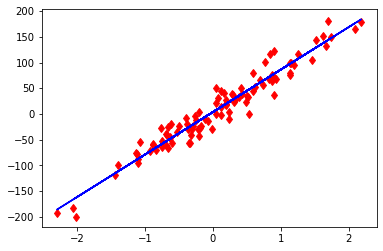

In [64]:
from sklearn import datasets

x_np, y_np = datasets.make_regression(n_samples=100,
                                      n_features=1,
                                      noise=20,
                                      random_state=1)
x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)
n_sample, n_feature = x.shape
input_size = n_feature
output_size = 1
model = nn.Linear(input_size, output_size, bias=True)
learing_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)
for e in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if e % 100 == 0:
        [w, b] = model.parameters()
        print(
            f"epoch={e} loss={loss:0.3f},weights={w[0].item():0.3f} bias={b[0].item():0.3f}"
        )
plt.plot(x_np, y_np, 'rd')
predicted = model(x).detach().numpy()
plt.plot(x_np, predicted, 'b')

In [65]:
x=2
y=4
x=2*y
print(x)
x+y=z
x

8
